In [1]:
import sys
# Python 3.7 is required
assert sys.version_info >= (3,7)

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Make sure that optimization is enabled
if not cv.useOptimized():
    cv.setUseOptimized(True)

cv.useOptimized()

True

###### Question 1
- Write a program to segment the boat and the people on it from the background. 
- Apply Otsu thresholding.
- Draw bounding box to identify the region where the boat and people are located.

In [45]:
# Read the color image
image = cv.imread("boat.jpg")
 
# Make a copy
new_image = image.copy()
 
# Convert the image to grayscale
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
 
# Display the grayscale image
cv.imshow('Gray image', gray)  
cv.waitKey(0) 
cv.destroyAllWindows() 
 
# Convert the grayscale image to binary
blur = cv.GaussianBlur(gray, (5, 5), 0)   # the third argument here is standard deviation
ret, th3 = cv.threshold(blur, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)

#ret, binary = cv.threshold(gray, 100, 255, cv.THRESH_OTSU)
 
# Display the binary image
cv.imshow('Binary image', binary)
cv.waitKey(0)
cv.destroyAllWindows()
 
# To detect object contours, we want a black background and a white 
# foreground, so we invert the image (i.e. 255 - pixel value)
inverted_binary = ~binary
cv.imshow('Inverted binary image', inverted_binary)
cv.waitKey(0) 
cv.destroyAllWindows()
 
# Find the contours on the inverted binary image, and store them in a list
# Contours are drawn around white blobs.
# hierarchy variable contains info on the relationship between the contours
contours, hierarchy = cv.findContours(inverted_binary, cv.RETR_LIST, cv.CHAIN_APPROX_NONE)
     
# Draw the contours (in red) on the original image and display the result
# Input color code is in BGR (blue, green, red) format
# -1 means to draw all contours
with_contours = cv.drawContours(image, contours, -1, (255,0,255), 3)
cv.imshow('Detected contours', with_contours)
cv.waitKey(0)
cv.destroyAllWindows()

x, y, w, h = cv.boundingRect(c)
cv.rectangle(with_contours,(x,y), (x+w,y+h), (255,0,0), 5)

# Make sure contour area is large enough
if (cv.contourArea(c)) > 10:
    cv.rectangle(with_contours,(x,y), (x+w,y+h), (255,0,0), 5)
         
cv.imshow('All contours with bounding box', with_contours)
cv.waitKey(0)
cv.destroyAllWindows()

###### Question 2
- Write a program to visualize the effect of size of structuring element on the morphological transformation (e.g. erosion, dilation, opening, and closing).
- Load the 'leaf.jfif' and perform thresholding to segment the leaf from the background.
- Create a GUI containing trackbar to control the size of structuring element and display the resulting image on a window alongside the trackbar.

In [19]:
img = cv.imread('leaf.jfif', 0)

#blur = cv.GaussianBlur(img, (5, 5), 0)

# save in directory
kernel = np.ones((5,5), np.uint8)

def trackbar(x):
    _, img_binary = cv.threshold(blur, x, 255, cv.THRESH_BINARY)
    erosion = cv.erode(img_binary, kernel, iterations = 1)
    cv.imshow('window', np.vstack([img_binary, erosion]))


cv.namedWindow('window')
cv.createTrackbar('threshold', 'window', 100, 255, trackbar)

cv.waitKey(0)
cv.destroyAllWindows()

In [18]:
#dilation
img = cv.imread('leaf.jfif', 0)

blur = cv.GaussianBlur(img, (5, 5), 0)

# save in directory
kernel = np.ones((5,5), np.uint8)

def trackbar(x):
    _, img_binary = cv.threshold(blur, x, 255, cv.THRESH_BINARY)
    dilation = cv.dilate(img_binary, kernel, iterations = 1)
    cv.imshow('window', np.vstack([img_binary, dilation]))


cv.namedWindow('window')
cv.createTrackbar('threshold', 'window', 100, 255, trackbar)

cv.waitKey(0)
cv.destroyAllWindows()

###### Question 3
- Apply the steps shown in exercise 4 to segment the porcelain from these images: "porcelain1.jfif" - "porcelain5.jfif".

TypeError: Image data of dtype <U9 cannot be converted to float

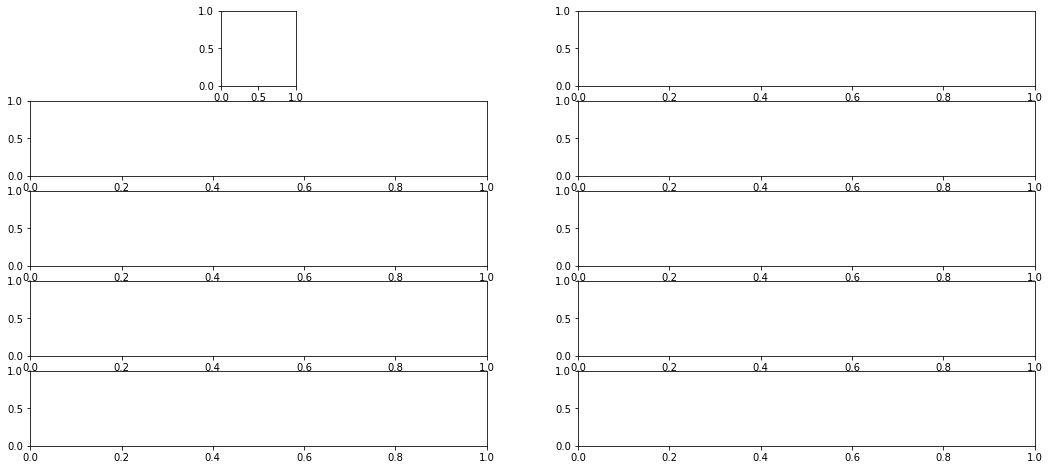

In [24]:
# initiate a big figure
# plt.figure(figsize=(18,8))

f, ax = plt.subplots(5, 2, figsize = (18, 8))
pant_list = ['pant.jfif', 'pant2.jfif', 'pant1.jfif', 'pant3.jfif', 'pant4.jfif', 'pant5.jfif']
i = 0

for i in range(5):
    # plt.subplot(5, 2, 2*i+1)
    # plt.imshow(pant_list[i])
    # plt.subplot(5, 2, 2*i+2)
    # plt.imshow(results[i])
    # plt.show()
    
    ax[i][0].imshow(pant_list[i])
    ax[i][1].imshow(results[i])
    
    i = i + 1
    
f.suptitle('Original images and its segmentation results')
plt.show()